In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import re
from bertopic import BERTopic
from wordcloud import WordCloud

C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distanc

In [3]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/combinedData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.015996217727661133
{'id': 'EJ1292238', 'title': 'What Makes a Good-Quality Language MOOC? An Empirical Study of Criteria to Evaluate the Quality of Online Language Courses from Learners&apos; Perspectives', 'author': 'Luo, Rong, Ye, Zixuan', 'description': "This paper focuses on quality assurance in language massive open online courses (LMOOCs). It is a qualitative study that adopts the grounded theory method and analyses evaluative comments on the quality of LMOOCs from learners' perspectives. With the data collected from 1,000 evaluations from English as a second language (ESL) learners on China's biggest MOOC platform &quot;iCourse&quot;, this study examines what has influenced learners' perceptions of LMOOCs and identifies the specific quality criteria of five types of them, including ESL courses for speaking, reading, writing, cultural studies, and integrated skills. The results of the study will lay a foundation for the esta

In [4]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.003000497817993164


In [5]:
model = BERTopic(verbose=True, embedding_model="allenai/scibert_scivocab_uncased")
#embeddingmodel embedding_model="all-MiniLM-L6-v2" or embedding_mode="all-mpnet-base-v2"
docs = df.description.to_list()
pub_dates = df.publicationdateyear.to_list()
topics, probabilities = model.fit_transform(docs)
topics_over_time = model.topics_over_time(docs, pub_dates)
model.get_topic_info()

No sentence-transformers model found with name C:\Users\joshu/.cache\torch\sentence_transformers\allenai_scibert_scivocab_uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\joshu/.cache\torch\sentence_transformers\allenai_scibert_scivocab_uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exac

,Topic,Count,Name
0,-1,1067,-1_the_and_of_to
1,0,168,0_of_and_the_in
2,1,89,1_the_group_learning_in
3,2,68,2_the_of_in_and
4,3,53,3_studies_of_research_the
5,4,48,4_students_the_student_and
6,5,37,5_database_case_data_and
7,6,33,6_quot_language_and_in
8,7,32,7_feedback_of_errors_the
9,8,31,8_perceived_learning_technology_the


In [6]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

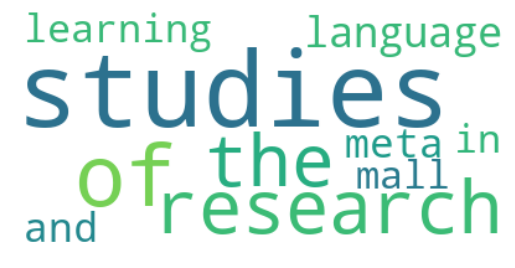

In [16]:
create_wordcloud(model, topic=3)

In [8]:
model.visualize_topics()

In [22]:
topics_to_include = list(range(1, 26))
model.visualize_barchart(topics= topics_to_include, width=300)

In [10]:
model.visualize_hierarchy()

In [11]:
hierarchical_topics = model.hierarchical_topics(docs)
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 26/26 [00:00<00:00, 305.65it/s]


In [12]:
model.visualize_heatmap()

In [21]:
model.visualize_topics_over_time(topics_over_time, topics=[1, 3, 4, 5, 6, 7, 8, 9, 10])
#can innclude topics changing topics_over_time TO topics_over_time, topics=[x, y, z, etc.]

In [23]:
model.visualize_topics_over_time(topics_over_time, topics=[11, 12, 13, 14, 15, 16, 17, 18, 19])


In [24]:
model.visualize_topics_over_time(topics_over_time, topics=[20, 21, 22, 23, 24, 25, 26])


In [25]:
model.visualize_topics_over_time(topics_over_time, topics=[3, 22])
#COVID-19 Topic
#meta studies

In [26]:
model.visualize_topics_over_time(topics_over_time)